In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
#pip install -U sentence-transformers

In [3]:
#from sentence_transformers import SentenceTransformer
#from sklearn.cluster import KMeans

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import json
from collections import Counter
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize 
import operator
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud


In [3]:
#!pip install pyLDAvis

In [6]:

from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
#import pyldavis
#import pyLDAvis.gensim_models # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [4]:
import numpy as np 
import pandas as pd 

In [8]:
#embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')


In [9]:
#df=pd.read_csv('benefitsdata.csv')
#df.head()

In [5]:
df=pd.read_csv('cashbackdata.csv')
df.head()

,CardVariant,Cashback
0,Flipkart Axis Bank Credit Card,5% cashback on Flipkart & Myntra. 4% cashback ...
1,Flipkart Axis Bank Credit Card,NaN
2,Flipkart Axis Bank Credit Card,NaN
3,Axis Bank Privilege Credit Card,NaN
4,Axis Bank Privilege Credit Card,NaN


In [69]:
#df =df[0:100]

In [6]:
df.info()
df.describe()
df.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CardVariant  675 non-null    object
 1   Cashback     138 non-null    object
dtypes: object(2)
memory usage: 10.7+ KB


,CardVariant,Cashback
count,675,138
unique,188,122
top,Lifestyle Home Centre SBI Card PRIME,Enjoy 10 Reward Points on every 100 Rs. spent ...
freq,13,3


<bound method DataFrame.info of                          CardVariant  \
0     Flipkart Axis Bank Credit Card   
1     Flipkart Axis Bank Credit Card   
2     Flipkart Axis Bank Credit Card   
3    Axis Bank Privilege Credit Card   
4    Axis Bank Privilege Credit Card   
..                               ...   
672   SBI ELITE Business Credit Card   
673   SBI ELITE Business Credit Card   
674   SBI ELITE Business Credit Card   
675   SBI ELITE Business Credit Card   
676   SBI ELITE Business Credit Card   

                                              Cashback  
0    5% cashback on Flipkart & Myntra. 4% cashback ...  
1                                                  NaN  
2                                                  NaN  
3                                                  NaN  
4                                                  NaN  
..                                                 ...  
672                                                NaN  
673                            

In [7]:
df1 = df.copy(deep=True)
df1.head()
df1.shape

,CardVariant,Cashback
0,Flipkart Axis Bank Credit Card,5% cashback on Flipkart & Myntra. 4% cashback ...
1,Flipkart Axis Bank Credit Card,NaN
2,Flipkart Axis Bank Credit Card,NaN
3,Axis Bank Privilege Credit Card,NaN
4,Axis Bank Privilege Credit Card,NaN


(677, 2)

In [8]:
df = df[df['Cashback'].notna()]

In [9]:
df.reset_index(inplace = True, drop = True)

In [10]:
df2 = df.copy(deep=True)
df2.head()
df2.shape

,CardVariant,Cashback
0,Flipkart Axis Bank Credit Card,5% cashback on Flipkart & Myntra. 4% cashback ...
1,AXIS Bank SELECT Credit Card,Earn 10 Axis EDGE points on every Rs. 200 spen...
2,Axis Bank Vistara Credit Card,Earn 2 CV Points* for every Rs 200 spent on th...
3,Axis Bank Vistara Signature Credit Card,Earn 4 CV Points* for every Rs. 200 spent on t...
4,Axis Bank Vistara Infinite Credit Card,Earn 6 CV Points* for every Rs. 200 spent on t...


(138, 2)

In [11]:
df['Cashback'] = df['Cashback'].astype("string")

In [12]:
df.head()

,CardVariant,Cashback
0,Flipkart Axis Bank Credit Card,5% cashback on Flipkart & Myntra. 4% cashback ...
1,AXIS Bank SELECT Credit Card,Earn 10 Axis EDGE points on every Rs. 200 spen...
2,Axis Bank Vistara Credit Card,Earn 2 CV Points* for every Rs 200 spent on th...
3,Axis Bank Vistara Signature Credit Card,Earn 4 CV Points* for every Rs. 200 spent on t...
4,Axis Bank Vistara Infinite Credit Card,Earn 6 CV Points* for every Rs. 200 spent on t...


In [13]:
df.to_csv('cashback_final.csv')

In [77]:
df.info

<bound method DataFrame.info of                                         CardVariant  \
0                    Flipkart Axis Bank Credit Card   
1                      AXIS Bank SELECT Credit Card   
2                     Axis Bank Vistara Credit Card   
3           Axis Bank Vistara Signature Credit Card   
4            Axis Bank Vistara Infinite Credit Card   
..                                              ...   
133                     Karur Vysya Bank - SBI Card   
134  Bank of Maharashtra - SBI Platinum Credit Card   
135                  Bank of Maharashtra - SBI Card   
136                  SBI PRIME Business Credit Card   
137                  SBI ELITE Business Credit Card   

                                              Cashback  
0    5% cashback on Flipkart & Myntra. 4% cashback ...  
1    Earn 10 Axis EDGE points on every Rs. 200 spen...  
2    Earn 2 CV Points* for every Rs 200 spent on th...  
3    Earn 4 CV Points* for every Rs. 200 spent on t...  
4    Earn 6 CV Points*

In [78]:
stop_words = nltk.corpus.stopwords.words('english')

In [79]:
porter = PorterStemmer()

In [80]:
#stemmer = SnowballStemmer("english")
preprocess_cashback=[]
for s in tqdm(df['Cashback'].values):
    #s=re.sub(r'S*\d\S*','',s)
    s=re.sub('[^a-zA-Z0-9]',' ',s)
#     soup=BeautifulSoup(s)
#     s=soup.get_text()
    s=re.sub(r'http\S+','',s)
    words=word_tokenize(s.lower())

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    s=' '.join(str(j) for j in words if j not in stop_words and (len(j)!=1 ))
    preprocess_cashback.append(s.strip())

100%|██████████| 138/138 [00:00<00:00, 2967.93it/s]


In [81]:
preprocess_cashback

['cashback flipkart myntra cashback preferred merchants cashback categories',
 'earn 10 axis edge points every rs 200 spends earn 2x per rs 200 retail shopping spends',
 'earn cv points every rs 200 spent axis bank vistara credit card redeem upgrades award flights faster options redeem points get bonus cv points upto economy class tickets achieving milestone spends',
 'earn cv points every rs 200 spent axis bank vistara signature credit card redeem upgrades award flights options redeem points get bonus cv points complimentary premium economy tickets achieving milestone spends',
 'earn cv points every rs 200 spent axis bank vistara infinite credit card redeem upgrades award flights faster options redeem points get bonus cv points complimentary business class tickets achieving milestone spends',
 'cashback freecharge spends cashback spends',
 'spends',
 '25 cashback online box office movie ticket purchases week zone easy credit card reward points earned movie offer transactions amount ca

In [84]:
#corpus = df["Cashback"].tolist()
#data = preprocess_cashback

In [85]:
#type(data)

In [149]:
def wordcloud(msg_lst):
    word_tokens =[]
    for msg in msg_lst:
        word_tokens.extend(word_tokenize(msg))
    #tokenize words from extracted text
     
    #word_tokens = [tok for tok in data.split()]
    #print(" \n word tokens are : ",word_tokens[:25]) 
    
    #define stopwords form nltk
    stopWords = stopwords.words('english')
    # define custom stop words
    # removing oxygen and oxgencrisis words from tokens list
#     stopWords2 = ['1','2','3','4','5','6','7','8','9','0','`','~','!','@','#','$','%','^','&','*','(',')','-','_','=',
#               '+','[',']','{','}','\\','|',':',';','/','"','<','>',',','.','?',"'",'"',"'s",'’','–','.','“','—','--',
#                   'http','https','...','..','…',"n't",'oxygen','oxygenemergency','भारत_का_गुनेहगार_मोदी','भारत_का_कुपुत्र_मोदी','co']
    
    #filter words(tokens) by removing stop words, numbers, special charactes and symbols
    #stopWords2 = ['http','https','000','rs','100','150','10','per']
    stopWords.extend(['http','https','000','rs','100','150','10','per','get','every','spent','spends','point','points','credit',
                     'card','20','reward','earn','lakh','annual','payback', 'cashback','rewards','enjoy','purchases','redeem','except fuel',
                     'bank','5x','categories','icici','month','spend','select','non fuel','redemption','upto','50','200','500',
                     '60','15','10x','except','fuel','non','convert','bonus','via','25','year','maximum','worth','instantly','payments',
                     'lakhs','sbi','axis','hdfc','day'])
    wordsFiltered = []
    for w in word_tokens:
        if  w.lower() not in stopWords:
            wordsFiltered.append(w.lower())
    #print("\n length of filtered tokens is : ",len(wordsFiltered))
    #print("\n filtered tokens are : ",wordsFiltered[:25])
    
    #get frequency distribution of filtered words
    Freq_dist_nltk=nltk.FreqDist(wordsFiltered)
    
    #sort the tokens based on the frequency distribution in descending order
    sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
    #print("\n frequency distribution of filtered and sorted tokens :",sorted_d[:25])
    print("\n frequency distribution nltk graph : ")
    #plot frequency distribution graph for top 25 frequent words
    Freq_dist_nltk.plot(25, cumulative=False)
    
    words_df = pd.DataFrame({'word':list(Freq_dist_nltk.keys()),   
             'count':list(Freq_dist_nltk.values())}) 
      # selecting top 20 most frequent words 
    d = words_df.nlargest(columns="count", n = 10)      
    plt.figure(figsize=(10,7)) 
    ax = sns.barplot(data=d, x= "word", y = "count") 
    ax.set(ylabel = 'Count') 
    plt.show()
    
    print("\n wordcloud graph : ")
    #plot wordcloud graph
    wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(Freq_dist_nltk)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")


 frequency distribution nltk graph : 


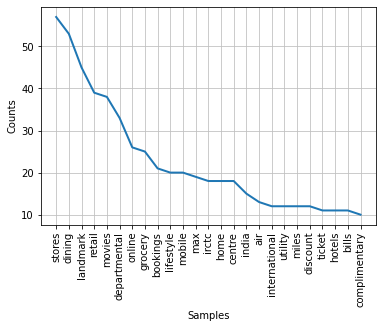

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:332: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/utils.py:551: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)


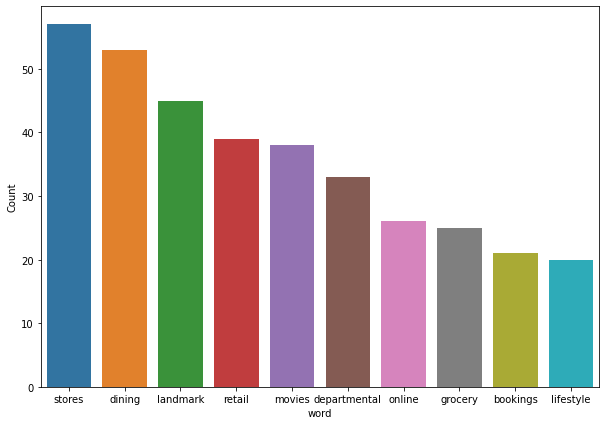


 wordcloud graph : 


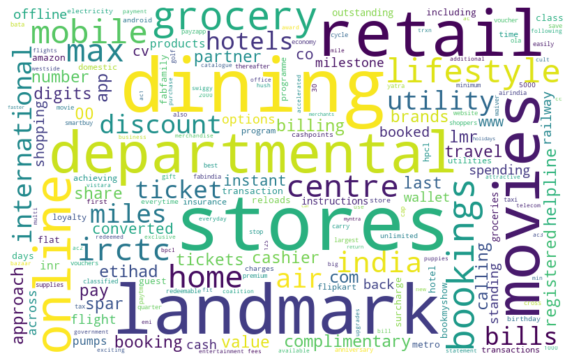

In [150]:
wordcloud(preprocess_cashback) 

In [151]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['http','https','000','rs','100','150','10','per','get','every','spent','spends','point','points','credit',
                     'card','20','reward','earn','lakh','annual','payback', 'cashback','rewards','enjoy','purchases','redeem','except fuel',
                     'bank','5x','categories','icici','month','spend','select','non fuel','redemption','upto','50','200','500',
                     '60','15','10x','except','fuel','non','convert','bonus','via','25','year','maximum','worth','instantly','payments',
                     'lakhs','sbi','axis','hdfc','day'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = preprocess_cashback
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /Users/ravi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

['flipkart', 'myntra', 'preferred', 'merchants']


In [152]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['flipkart', 'myntra', 'preferred', 'merchants']


In [153]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [154]:
#conda install -c conda-forge spacy  #one time run in cmd prompt
#python -m spacy download en #one time run in cmd prompt

In [155]:
#spacy.cli.download("en_core_web_sm")

In [156]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['flipkart', 'myntra', 'prefer', 'merchant']]


In [157]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])


[[(0, 1), (1, 1), (2, 1), (3, 1)]]


In [158]:
id2word[0]

'flipkart'

In [159]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('flipkart', 1), ('merchant', 1), ('myntra', 1), ('prefer', 1)]]

In [160]:
from pprint import pprint
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=100,
                                           update_every=1,
                                           chunksize=5,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
# Print the Keyword in the 6 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
doc_lda

[(0,
  '0.076*"complimentary" + 0.052*"cash" + 0.051*"golf" + 0.051*"classified" + '
  '0.051*"carry" + 0.038*"quarter" + 0.027*"good" + 0.026*"loyalty" + '
  '0.026*"program" + 0.026*"office"'),
 (1,
  '0.096*"grocery" + 0.084*"hotel" + 0.079*"booking" + 0.074*"movie" + '
  '0.065*"dine" + 0.047*"utility" + 0.033*"value" + 0.029*"dining" + '
  '0.029*"mile" + 0.026*"ticket"'),
 (2,
  '0.117*"retail" + 0.077*"landmark" + 0.045*"mobile" + 0.032*"billing" + '
  '0.032*"max" + 0.031*"call" + 0.026*"instant" + 0.026*"convert" + '
  '0.026*"last" + 0.026*"number"'),
 (3,
  '0.195*"discount" + 0.109*"flat" + 0.087*"com" + 0.067*"flight" + '
  '0.057*"etihad" + 0.034*"guest" + 0.023*"class" + 0.012*"economy" + '
  '0.012*"business" + 0.012*"direct"'),
 (4,
  '0.186*"store" + 0.129*"departmental" + 0.060*"bill" + 0.028*"dine" + '
  '0.026*"birthday" + 0.024*"gift" + 0.022*"brand" + 0.022*"voucher" + '
  '0.022*"shopper" + 0.022*"bata"')]


In [161]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.022204497143374

Coherence Score:  0.6154586355925609


In [162]:
#pip install pyldavis

In [163]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [164]:
# Visualize the topics
pyLDAvis.enable_notebook()


In [165]:
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.241232  0.234243       1        1  33.612767
4      0.129454 -0.274969       2        1  23.249226
2     -0.013154 -0.071887       3        1  22.333480
3     -0.078167  0.047732       4        1  11.593989
0     -0.279364  0.064881       5        1   9.210539, topic_info=             Term       Freq      Total Category  logprob  loglift
121         store  64.000000  64.000000  Default  30.0000  30.0000
247      discount  33.000000  33.000000  Default  29.0000  29.0000
113  departmental  44.000000  44.000000  Default  28.0000  28.0000
5          retail  38.000000  38.000000  Default  27.0000  27.0000
179       grocery  48.000000  48.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
106     available   3.166244   4.889398   Topic5  -3.7590   1.9503
315           inr   1.663381   2.669001   Topic5  -4.4027   1.9120
240     exclusive   0.865140   1.524286   Topic5  -5.0565   1.8184
177         cycle   0.753135   1.391210   Topic5  -5.1951   1.7711
190        supply   1.487990   8.468800   Topic5  -4.5142   0.6459

[189 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
298       5  0.680783     access
242       4  0.805372  accessory
218       3  0.789791    account
286       2  0.915630     accrue
7         2  0.844416    achieve
...     ...       ...        ...
204       2  0.677239     waiver
127       4  0.575216     wallet
296       2  0.922378   westside
59        1  0.967897        www
194       2  0.882154      yatra

[161 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 4, 1])

In [166]:
pyLDAvis.display(vis)


In [167]:
#type(lda_model[corpus])

In [168]:
# #Building LDA Mallet Model
# # Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
# mallet_path = 'mallet-2.0.8/bin/mallet' # update this path
# ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=5, id2word=id2word)

In [169]:
# # Show Topics
# pprint(ldamallet.show_topics(formatted=False))

# # Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

In [197]:
#How to find the optimal number of topics for LDA?
#build many LDA models with different values of number of topics (k) and pick the one that gives the highest coherence value.

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        #print('number of topics : '+ str(num_topics))
        model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=100,
                                           update_every=1,
                                           chunksize=8,
                                           passes=20,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        print('number of topics : '+ str(num_topics)+' | coherence value : '+str(coherencemodel.get_coherence()))
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [198]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=12, step=1)

number of topics : 2 | coherence value : 0.5624517705744976
number of topics : 3 | coherence value : 0.7146993128034199
number of topics : 4 | coherence value : 0.7075745561385408
number of topics : 5 | coherence value : 0.6411684116385571
number of topics : 6 | coherence value : 0.5847103249111568
number of topics : 7 | coherence value : 0.5651229705324011
number of topics : 8 | coherence value : 0.5100701118978348
number of topics : 9 | coherence value : 0.5009333327998606
number of topics : 10 | coherence value : 0.46153632272380507
number of topics : 11 | coherence value : 0.4847034144746326


Text(0.5, 0, 'Num Topics')

Text(0, 0.5, 'Coherence score')

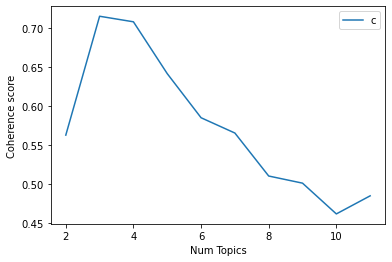

In [199]:
# Show graph
limit=12; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [200]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

#If the coherence score seems to keep increasing, it may make better sense to pick the model that gave the highest CV before flattening out

Num Topics = 2  has Coherence Value of 0.5625
Num Topics = 3  has Coherence Value of 0.7147
Num Topics = 4  has Coherence Value of 0.7076
Num Topics = 5  has Coherence Value of 0.6412
Num Topics = 6  has Coherence Value of 0.5847
Num Topics = 7  has Coherence Value of 0.5651
Num Topics = 8  has Coherence Value of 0.5101
Num Topics = 9  has Coherence Value of 0.5009
Num Topics = 10  has Coherence Value of 0.4615
Num Topics = 11  has Coherence Value of 0.4847


In [202]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.082*"store" + 0.076*"grocery" + 0.076*"departmental" + 0.055*"movie" + '
  '0.053*"dine" + 0.021*"bill" + 0.020*"stand" + 0.020*"instruction" + '
  '0.020*"utility" + 0.018*"dining"'),
 (1,
  '0.060*"hotel" + 0.050*"booking" + 0.048*"discount" + 0.043*"complimentary" '
  '+ 0.033*"com" + 0.029*"flat" + 0.029*"cash" + 0.029*"golf" + 0.029*"carry" '
  '+ 0.029*"classified"'),
 (2,
  '0.056*"landmark" + 0.055*"retail" + 0.035*"online" + 0.027*"store" + '
  '0.026*"movie" + 0.025*"mobile" + 0.024*"dining" + 0.023*"call" + '
  '0.022*"billing" + 0.022*"max"')]


In [203]:
optmod_vis = gensimvis.prepare(optimal_model, corpus, id2word)
optmod_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.151167  0.184563       1        1  36.064183
0     -0.142043 -0.188432       2        1  34.358589
1      0.293209  0.003869       3        1  29.577228, topic_info=             Term       Freq      Total Category  logprob  loglift
179       grocery  39.000000  39.000000  Default  30.0000  30.0000
113  departmental  39.000000  39.000000  Default  29.0000  29.0000
49          hotel  26.000000  26.000000  Default  28.0000  28.0000
229      landmark  30.000000  30.000000  Default  27.0000  27.0000
40        booking  22.000000  22.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
81        loyalty   6.420328   7.208348   Topic3  -4.2188   1.1024
155          dine   7.161236  34.349483   Topic3  -4.1096  -0.3497
67        utility   6.792118  17.461818   Topic3  -4.1625   0.2739
121         store   6.762337  63.006078   Topic3  -4.1669  -1.0137
108          bill   6.375760  17.189242   Topic3  -4.2257   0.2264

[137 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
298       3  0.861306    access
218       1  1.018632   account
286       2  0.849422    accrue
7         2  1.001078   achieve
132       1  0.944427    amazon
...     ...       ...       ...
204       1  0.273309    waiver
204       2  0.819927    waiver
127       1  0.855777    wallet
296       2  0.958242  westside
194       2  0.884104     yatra

[113 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

In [176]:
#Finding the dominant topic in each sentence
#find the topic number that has the highest percentage contribution in that document.
#The format_topics_sentences() function below nicely aggregates this information in a presentable table.

def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        #row = sorted(row, key=lambda x: (x[1]), reverse=True)
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)




In [177]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2,0.8247,"retail, dining, landmark, mobile, max, billing...",cashback flipkart myntra cashback preferred me...
1,1,2,0.7829,"retail, dining, landmark, mobile, max, billing...",earn 10 axis edge points every rs 200 spends e...
2,2,1,0.4144,"day, first, online, exclusive, cycle, cv, amaz...",earn cv points every rs 200 spent axis bank vi...
3,3,1,0.3838,"day, first, online, exclusive, cycle, cv, amaz...",earn cv points every rs 200 spent axis bank vi...
4,4,1,0.4187,"day, first, online, exclusive, cycle, cv, amaz...",earn cv points every rs 200 spent axis bank vi...
5,5,1,0.5462,"day, first, online, exclusive, cycle, cv, amaz...",cashback freecharge spends cashback spends
6,6,3,0.4002,"store, grocery, departmental, dine, movie, uti...",spends
7,7,3,0.4381,"store, grocery, departmental, dine, movie, uti...",25 cashback online box office movie ticket pur...
8,8,0,0.9634,"hotel, booking, com, value, mile, ticket, air,...",20 cashback bare fare domestic flight bookings...
9,9,1,0.6484,"day, first, online, exclusive, cycle, cv, amaz...",earn payback points icici bank rewards every r...


In [178]:
df_final= df_dominant_topic[['Dominant_Topic',  'Keywords', 'Text']]

In [179]:
df_final

,Dominant_Topic,Keywords,Text
0,2,"retail, dining, landmark, mobile, max, billing...",cashback flipkart myntra cashback preferred me...
1,2,"retail, dining, landmark, mobile, max, billing...",earn 10 axis edge points every rs 200 spends e...
2,1,"day, first, online, exclusive, cycle, cv, amaz...",earn cv points every rs 200 spent axis bank vi...
3,1,"day, first, online, exclusive, cycle, cv, amaz...",earn cv points every rs 200 spent axis bank vi...
4,1,"day, first, online, exclusive, cycle, cv, amaz...",earn cv points every rs 200 spent axis bank vi...
...,...,...,...
133,3,"store, grocery, departmental, dine, movie, uti...",enjoy value back get 10x reward points per rs ...
134,0,"hotel, booking, com, value, mile, ticket, air,...",earn reward points every rs 100 spent categori...
135,3,"store, grocery, departmental, dine, movie, uti...",enjoy value back get 10x reward points per rs ...
136,4,"discount, complimentary, flat, cash, golf, car...",get 10 reward points per rs 100 spent dining u...


In [180]:
df2.head()

,CardVariant,Cashback
0,Flipkart Axis Bank Credit Card,5% cashback on Flipkart & Myntra. 4% cashback ...
1,AXIS Bank SELECT Credit Card,Earn 10 Axis EDGE points on every Rs. 200 spen...
2,Axis Bank Vistara Credit Card,Earn 2 CV Points* for every Rs 200 spent on th...
3,Axis Bank Vistara Signature Credit Card,Earn 4 CV Points* for every Rs. 200 spent on t...
4,Axis Bank Vistara Infinite Credit Card,Earn 6 CV Points* for every Rs. 200 spent on t...


In [181]:
df2['CardVariant']

0                      Flipkart Axis Bank Credit Card
1                        AXIS Bank SELECT Credit Card
2                       Axis Bank Vistara Credit Card
3             Axis Bank Vistara Signature Credit Card
4              Axis Bank Vistara Infinite Credit Card
                            ...                      
133                       Karur Vysya Bank - SBI Card
134    Bank of Maharashtra - SBI Platinum Credit Card
135                    Bank of Maharashtra - SBI Card
136                    SBI PRIME Business Credit Card
137                    SBI ELITE Business Credit Card
Name: CardVariant, Length: 138, dtype: object

In [182]:
#df2.reset_index(inplace = True, drop = True)

In [183]:
df_final['CardVariant'] = df2['CardVariant']

In [184]:
df_final.head()

,Dominant_Topic,Keywords,Text,CardVariant
0,2,"retail, dining, landmark, mobile, max, billing...",cashback flipkart myntra cashback preferred me...,Flipkart Axis Bank Credit Card
1,2,"retail, dining, landmark, mobile, max, billing...",earn 10 axis edge points every rs 200 spends e...,AXIS Bank SELECT Credit Card
2,1,"day, first, online, exclusive, cycle, cv, amaz...",earn cv points every rs 200 spent axis bank vi...,Axis Bank Vistara Credit Card
3,1,"day, first, online, exclusive, cycle, cv, amaz...",earn cv points every rs 200 spent axis bank vi...,Axis Bank Vistara Signature Credit Card
4,1,"day, first, online, exclusive, cycle, cv, amaz...",earn cv points every rs 200 spent axis bank vi...,Axis Bank Vistara Infinite Credit Card


In [185]:
df_final.to_csv('topics_5.csv')

In [186]:
df_cardsgroup = df_final.groupby('Dominant_Topic').agg(lambda x: x.tolist())

In [187]:
df_cardsgroup

,Keywords,Text,CardVariant
Dominant_Topic,,,
0,"[hotel, booking, com, value, mile, ticket, air...",[20 cashback bare fare domestic flight booking...,"[Axis Bank My Wings Credit Card, Paytm HDFC Ba..."
1,"[day, first, online, exclusive, cycle, cv, ama...",[earn cv points every rs 200 spent axis bank v...,"[Axis Bank Vistara Credit Card, Axis Bank Vist..."
2,"[retail, dining, landmark, mobile, max, billin...",[cashback flipkart myntra cashback preferred m...,"[Flipkart Axis Bank Credit Card, AXIS Bank SEL..."
3,"[store, grocery, departmental, dine, movie, ut...","[spends, 25 cashback online box office movie t...","[Axis bank ACE Credit Card, Axis Bank MY ZONE ..."
4,"[discount, complimentary, flat, cash, golf, ca...",[complimentary ola select cult fit live bookmy...,"[Diners Club Black Credit Card, Diners Club Pr..."


In [188]:
#Find the most representative document for each topic
# Group top 5 sentences under each topic
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0,0.9634,"hotel, booking, com, value, mile, ticket, air,...",20 cashback bare fare domestic flight bookings...
1,1,0.9472,"day, first, online, exclusive, cycle, cv, amaz...",earn 10x cashpoints favourite merchants big ba...
2,2,0.8637,"retail, dining, landmark, mobile, max, billing...",enjoy reward points every 100 rs spent online ...
3,3,0.9445,"store, grocery, departmental, dine, movie, uti...",get 20 reward points per rs 100 spent standing...
4,4,0.8820,"discount, complimentary, flat, cash, golf, car...",enjoy freedom paying fuel surcharge across pet...
